In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pickleshare import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle as pkl
import glob
import os
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate

In [ ]:
path = '/content/drive/MyDrive/SMTP/Data/smtp.log'

In [ ]:
columns = ['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','trans_depth','helo','mailfrom','rcptto','date','from','to','cc','reply_to','msg_id','in_reply_to','subject','x_originating_ip','first_received','second_received','last_reply','path','user_agent','tls','fuids']
df = pd.read_csv(path, sep="\t", comment="#", header=None, names=columns)

In [ ]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,helo,mailfrom,rcptto,...,in_reply_to,subject,x_originating_ip,first_received,second_received,last_reply,path,user_agent,tls,fuids
0,1.400467e+09,CYn0YMNGeWiPxv5x4,192.168.204.222,49487,173.194.65.27,25,1,mailserver.localhost.com,adriana_pedigo@adriana-pedigo.us,-,...,-,-,-,-,-,250 2.1.0 OK g41si11792591eep.246 - gsmtp,"173.194.65.27,192.168.204.222",-,F,(empty)
1,1.485967e+09,CuTilE2Vf0lCvypBoe,10.2.1.101,49214,216.200.145.235,25,1,thomaskeller.com,gcromwell@thomaskeller.com,sales@externi.com,...,-,-,-,-,-,550 Recipient Rejected: No account by that nam...,"216.200.145.235,10.2.1.101",-,F,(empty)
2,1.485967e+09,CyS5A42ERsYMLb3wM3,10.2.1.101,49213,213.199.180.138,25,1,thomaskeller.com,gcromwell@thomaskeller.com,oh3fexq8.0463183@bonesupport.com,...,-,-,-,-,-,"550 5.1.8 Access denied, bad outbound sender","213.199.180.138,10.2.1.101",-,F,(empty)
3,1.485967e+09,C8d8c11YFnqxcn6db5,10.2.1.101,49873,213.199.154.23,25,1,thomaskeller.com,gcromwell@thomaskeller.com,ormesby_primary_school@redcar-cleveland.gov.uk,...,-,-,-,-,-,"550 5.1.8 Access denied, bad outbound sender","213.199.154.23,10.2.1.101",-,F,(empty)
4,1.485967e+09,CQ4zNr2n2S755ATbi,10.2.1.101,49869,213.199.180.170,25,1,thomaskeller.com,gcromwell@thomaskeller.com,frederic.convent@proxistore.com,...,-,-,-,-,-,"550 5.1.8 Access denied, bad outbound sender","213.199.180.170,10.2.1.101",-,F,(empty)


In [ ]:
df.shape

(3645, 26)

In [ ]:
# id.orig_p
# id.resp_p
# path (count)
# tls
# helo (count periods)
# mailfrom (count periods & digits)
# rcptto
# subject

In [ ]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'trans_depth', 'helo', 'mailfrom', 'rcptto', 'date', 'from', 'to', 'cc',
       'reply_to', 'msg_id', 'in_reply_to', 'subject', 'x_originating_ip',
       'first_received', 'second_received', 'last_reply', 'path', 'user_agent',
       'tls', 'fuids'],
      dtype='object')

In [ ]:
df = df.drop(['ts', 'uid', 'id.orig_h',  'id.resp_h',
       'trans_depth', 'date', 'from', 'to', 'cc',
       'reply_to', 'msg_id', 'in_reply_to','x_originating_ip',
       'first_received', 'second_received', 'last_reply', 'user_agent','subject',
       'fuids'],axis=1)

In [ ]:
df.head()

,id.orig_p,id.resp_p,helo,mailfrom,rcptto,path,tls
0,49487,25,mailserver.localhost.com,adriana_pedigo@adriana-pedigo.us,-,"173.194.65.27,192.168.204.222",F
1,49214,25,thomaskeller.com,gcromwell@thomaskeller.com,sales@externi.com,"216.200.145.235,10.2.1.101",F
2,49213,25,thomaskeller.com,gcromwell@thomaskeller.com,oh3fexq8.0463183@bonesupport.com,"213.199.180.138,10.2.1.101",F
3,49873,25,thomaskeller.com,gcromwell@thomaskeller.com,ormesby_primary_school@redcar-cleveland.gov.uk,"213.199.154.23,10.2.1.101",F
4,49869,25,thomaskeller.com,gcromwell@thomaskeller.com,frederic.convent@proxistore.com,"213.199.180.170,10.2.1.101",F


In [ ]:
df.shape

(3645, 7)

In [ ]:
df['tls'].unique()

array(['F', 'T', nan], dtype=object)

# Data Preprocessing

In [ ]:
df['id.orig_p']=df['id.orig_p'].replace('-','0')
df['id.orig_p'] =df['id.orig_p'].astype(int)
df['id.resp_p']=df['id.resp_p'].replace('-','0')
df['id.resp_p'] =df['id.resp_p'].astype(int)
df['helo']=df['helo'].replace('-',np.nan)
df['mailfrom']=df['mailfrom'].replace('-',np.nan)
df['rcptto']=df['rcptto'].replace('-',np.nan)
df['path']=df['path'].replace('-',np.nan)

In [ ]:
df = df.dropna()

In [ ]:
# Define a mapping dictionary
mapping = {'T': 1, 'F': 0}
df['tls'] = df['tls'].map(mapping)
df['tls'] = df['tls'].astype(int)

# Rcptto

In [ ]:
df['rcptto_dot_count'] = df['rcptto'].apply(lambda x: x.count('.'))

df['rcptto_count']=df['rcptto'].str.count('.')

# MailFrom

In [ ]:
df['mailfrom_dot_count'] = df['mailfrom'].apply(lambda x: x.count('.'))

df['mailfrom_count']=df['mailfrom'].str.count('.')

# HELO

In [ ]:
df['helo_dot_count'] = df['helo'].apply(lambda x: x.count('.'))

df['helo_count']=df['helo'].str.count('.')

# Path

In [ ]:
# Filter out rows where 'path' is not equal to the string 'nan'
df = df[df['path'] != 'nan']
df['path_count'] = df['path'].str.split(',').str.len()
# Split the 'path' column using a vectorized operation and assign it back to the same column
df['path'] = df['path'].str.split(',').str[0]

In [ ]:
import ipaddress
from ipaddress import ip_address
def Ip_To_int(ip):
    arr=[]
    try:
        for i in ip:
            if  type(ip_address(str(i))) is ipaddress.IPv4Address:
                r=int(ipaddress.IPv4Address(str(i)))
            if type(ip_address(str(i))) is ipaddress.IPv6Address:
                r=int(ipaddress.IPv6Address(str(i)))
            arr.append(r)
        return arr
    except Exception as e:
        print(f"Error occurred while converting IP addresses: {e}")
        exit()

In [ ]:
df['path'] =Ip_To_int(df['path'])

# Drop unused Columns

In [ ]:
df = df.drop(['helo','mailfrom','rcptto'],axis=1)

In [ ]:
df.head()

,id.orig_p,id.resp_p,path,tls,rcptto_dot_count,rcptto_count,mailfrom_dot_count,mailfrom_count,helo_dot_count,helo_count,path_count
1,49214,25,3637023211,0,1,17,1,26,1,16,2
2,49213,25,3586634890,0,2,32,1,26,1,16,2
3,49873,25,3586628119,0,2,46,1,26,1,16,2
4,49869,25,3586634922,0,2,31,1,26,1,16,2
5,49881,25,3586634922,0,1,17,1,26,1,16,2


# Data Scalling

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [ ]:

with open('/content/drive/MyDrive/SMTP/Model/scaler.pkl','wb') as f:
    pickle.dump(scaler, f)
# with open('file/path/scaler.pkl','rb') as f:
#     sc = pickle.load(f)

In [ ]:
scaled_features

array([[-0.24087681, -0.61486804,  1.3220994 , ..., -0.63416728,
         0.23196533, -0.13046219],
       [-0.24100079, -0.61486804,  1.27341768, ..., -0.63416728,
         0.23196533, -0.13046219],
       [-0.15917058, -0.61486804,  1.27341114, ..., -0.63416728,
         0.23196533, -0.13046219],
       ...,
       [-0.16053442,  2.57444559,  0.66882904, ..., -1.31098528,
        -0.61673718, -0.13046219],
       [-0.16016246,  2.57444559,  0.66882904, ..., -1.31098528,
        -0.61673718, -0.13046219],
       [-0.16003847,  2.57444559,  0.66882904, ..., -1.31098528,
        -0.61673718, -0.13046219]])

# Data Modeling Using AutoEncoder

In [ ]:
X_train = scaled_features


input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=60, batch_size=64, shuffle=True)

Epoch 1/60
16/16 [==============================] - 1s 3ms/step - loss: 1.1336
Epoch 2/60
16/16 [==============================] - 0s 2ms/step - loss: 1.0793
Epoch 3/60
16/16 [==============================] - 0s 3ms/step - loss: 1.0294
Epoch 4/60
16/16 [==============================] - 0s 5ms/step - loss: 0.9815
Epoch 5/60
16/16 [==============================] - 0s 4ms/step - loss: 0.9362
Epoch 6/60
16/16 [==============================] - 0s 4ms/step - loss: 0.8939
Epoch 7/60
16/16 [==============================] - 0s 4ms/step - loss: 0.8556
Epoch 8/60
16/16 [==============================] - 0s 4ms/step - loss: 0.8208
Epoch 9/60
16/16 [==============================] - 0s 5ms/step - loss: 0.7904
Epoch 10/60
16/16 [==============================] - 0s 4ms/step - loss: 0.7640
Epoch 11/60
16/16 [==============================] - 0s 4ms/step - loss: 0.7418
Epoch 12/60
16/16 [==============================] - 0s 3ms/step - loss: 0.7228
Epoch 13/60
16/16 [==============================

In [ ]:
train_pred = autoencoder.predict(X_train)
train_mse = np.mean(np.square(X_train - train_pred), axis=1)

threshold = np.percentile(train_mse, 95)

31/31 [==============================] - 0s 2ms/step


In [ ]:
threshold

1.80032779137423

In [ ]:
all_pred = autoencoder.predict(scaled_features)
all_mse = np.mean(np.square(scaled_features - all_pred), axis=1)

anomalies = df.loc[all_mse > threshold]

31/31 [==============================] - 0s 2ms/step


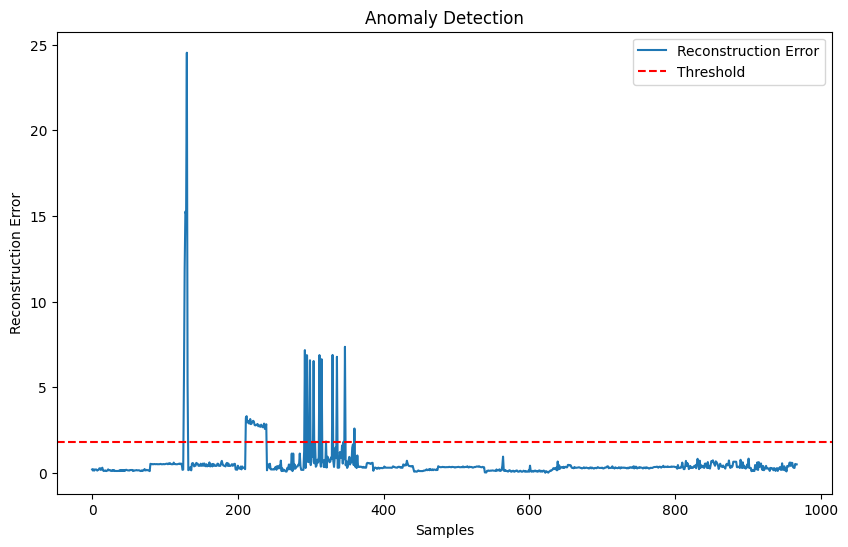

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(all_mse, label='Reconstruction Error')
# plt.plot(np.where(anomalies, train_mse, None), 'ro', label='Anomalies')
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Samples')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

In [ ]:
anomaly = all_mse>threshold
df['anomalies'] = anomaly

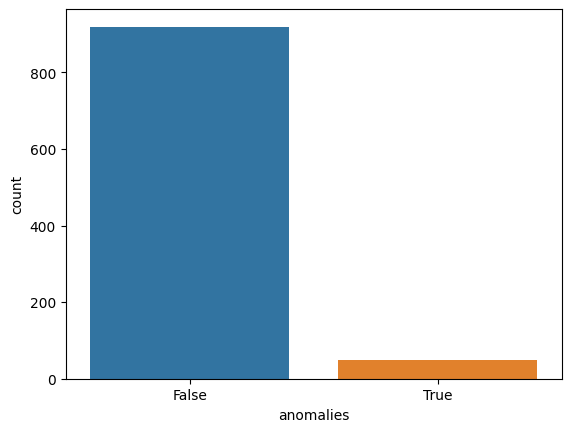

In [ ]:
import seaborn as sns
sns.countplot(x='anomalies',data=df)
plt.show()

In [ ]:
df['anomalies'].value_counts()

False    919
True      49
Name: anomalies, dtype: int64

In [ ]:
df.shape

(968, 12)

In [ ]:
autoencoder.save('/content/drive/MyDrive/SMTP/Model/SMTP_AnomalyDetection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
